# Movie Data Visualization and Analytics

## Team name: BO

### Team Member: Berkay ÇINAR , Oğulcan BAŞARAN

### Title : Movie Data from 2006 to 2016

#### Data: https://www.kaggle.com/PromptCloudHQ/imdb-data

#### Description : Finding out and predict ratings, revenue and Metascore. Also, understanding what contributes to prediction.

#### Goals : 

- Find relation between rating and Metascore.

- Analyze on highest/lowest coefficient also try to make predictions of variables.

- Apply machine lerning algorithm with KNN, Logistic and Linear Regression

### Libraries

In [1]:
#Current libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

#Libraries for deep learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


### Read the Data

In [2]:
#Preview data
data = pd.read_csv('MovieData.csv')

In [3]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:
# Basic check of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [5]:
#Describe of Data
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [6]:
#Features in the data
print(data.columns.values)

['Rank' 'Title' 'Genre' 'Description' 'Director' 'Actors' 'Year'
 'Runtime (Minutes)' 'Rating' 'Votes' 'Revenue (Millions)' 'Metascore']


In [7]:
#Count of data
count = len(data['Title'].unique())
print("Count of data: ", count)

Count of data:  999


### Initial idea about of data

In [8]:
#Check number of rows and columns
print("Number of rows and columns: ", data.shape)
print("\n")

#Check the data type of each column
print("Data Type: \n", data.dtypes)

Number of rows and columns:  (1000, 12)


Data Type: 
 Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


### Calculate the average movie duration

In [9]:
#Count of movies' runtimes.
data["Runtime (Minutes)"].value_counts()

108    31
100    28
117    27
110    26
106    26
118    26
102    25
112    24
104    23
123    23
92     22
98     22
95     22
101    22
113    22
111    22
97     22
115    21
107    20
94     20
109    19
120    19
96     19
105    17
119    17
114    17
116    17
99     16
88     15
124    14
       ..
150     4
151     4
153     4
135     4
157     3
147     3
180     3
169     3
142     3
162     3
161     3
84      3
152     2
80      2
149     2
73      2
154     2
156     2
82      1
191     1
187     1
145     1
159     1
160     1
163     1
164     1
166     1
170     1
172     1
66      1
Name: Runtime (Minutes), Length: 94, dtype: int64

In [10]:
#Calculate the average movie duration
time = data['Runtime (Minutes)'].mean()

print("Average movie duration: ", time)

Average movie duration:  113.172


### Finding the shortes and longest movie duration

In [11]:
# Sort the data by duration to find the shortest and longest 
data.sort_values('Runtime (Minutes)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,0.29,85.0
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
819,820,Wolves at the Door,"Horror,Thriller",Four friends gather at an elegant home during ...,John R. Leonetti,"Katie Cassidy, Elizabeth Henstridge, Adam Camp...",2016,73,4.6,564,NaN,63.0
711,712,La tortue rouge,"Animation,Fantasy",A man is shipwrecked on a deserted island and ...,Michael Dudok de Wit,"Emmanuel Garijo, Tom Hudson, Baptiste Goy, Axe...",2016,80,7.6,11482,0.92,86.0
949,950,Kicks,Adventure,Brandon is a 15 year old whose dream is a pair...,Justin Tipping,"Jahking Guillory, Christopher Jordan Wallace,C...",2016,80,6.1,2417,0.15,69.0
258,259,Lights Out,Horror,Rebecca must unlock the terror behind her litt...,David F. Sandberg,"Teresa Palmer, Gabriel Bateman, Maria Bello,Bi...",2016,81,6.4,69823,67.24,58.0
317,318,The Stakelander,"Action,Horror",When his home of New Eden is destroyed by a re...,Dan Berk,"Connor Paolo, Nick Damici, Laura Abramsen, A.C...",2016,81,5.3,1263,NaN,NaN
862,863,"Alexander and the Terrible, Horrible, No Good,...","Comedy,Family",Alexander's day begins with gum stuck in his h...,Miguel Arteta,"Steve Carell, Jennifer Garner, Ed Oxenbould, D...",2014,81,6.2,32310,66.95,54.0
382,383,Hush,"Horror,Thriller",A deaf writer who retreated into the woods to ...,Mike Flanagan,"John Gallagher Jr., Kate Siegel, Michael Trucc...",2016,81,6.6,45867,NaN,67.0
444,445,The Thinning,Thriller,"""The Thinning"" takes place in a post-apocalypt...",Michael J. Gallagher,"Logan Paul, Peyton List, Lia Marie Johnson,Cal...",2016,81,6.0,4531,NaN,31.0


In [12]:
# Sort the data by rating to find the lowest and highest
rate = data.sort_values('Rating', ascending=False)

#Print top 15 movies
rate[['Title', 'Votes', 'Rating']].head(15)


,Title,Votes,Rating
54,The Dark Knight,1791916,9.0
80,Inception,1583625,8.8
117,Dangal,48969,8.8
36,Interstellar,1047747,8.6
96,Kimi no na wa,34110,8.6
249,The Intouchables,557965,8.6
133,Whiplash,477276,8.5
64,The Prestige,913152,8.5
99,The Departed,937414,8.5
991,Taare Zameen Par,102697,8.5


In [13]:
#Print worst 15 movies
low= data[(data.Rating >= 0) & (data.Rating < 3.0)]
low.head()

#Number of worst movies is 3

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0


In [14]:
#Print moderate 15 movies

med= data[(data.Rating > 3) & (data.Rating < 7.0)]
med.head(15)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0
15,16,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0
17,18,Jason Bourne,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0
20,21,Gold,"Adventure,Drama,Thriller","Kenny Wells, a prospector desperate for a luck...",Stephen Gaghan,"Matthew McConaughey, Edgar Ramírez, Bryce Dall...",2016,120,6.7,19053,7.22,49.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
23,24,Trolls,"Animation,Adventure,Comedy","After the Bergens invade Troll Village, Poppy,...",Walt Dohrn,"Anna Kendrick, Justin Timberlake,Zooey Deschan...",2016,92,6.5,38552,153.69,56.0
24,25,Independence Day: Resurgence,"Action,Adventure,Sci-Fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0


### Analyze by Visualization form in Data

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64


(array([ 44.,  53.,   0.,  52.,  51.,   0.,  60.,  63.,   0.,  64.,  91.,
          0.,  98., 127., 297.]),
 array([2006.        , 2006.66666667, 2007.33333333, 2008.        ,
        2008.66666667, 2009.33333333, 2010.        , 2010.66666667,
        2011.33333333, 2012.        , 2012.66666667, 2013.33333333,
        2014.        , 2014.66666667, 2015.33333333, 2016.        ]),
 <a list of 15 Patch objects>)

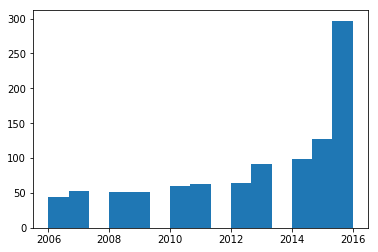

In [15]:
#Distribution of years
year1 = np.sort(data['Year'].unique(), axis=None)
print(year1)

year2 = data['Year'].value_counts()
print(year2)
plt.hist(data['Year'], bins=15)

This histogram tells us that most of the movies have the duration of 100 with 120 minutes


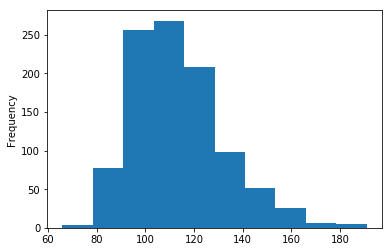

In [16]:
# Creating histogram graph of duration
data['Runtime (Minutes)'].plot(kind='hist', bins=10)

print('This histogram tells us that most of the movies have the duration of 100 with 120 minutes')

108    31
100    28
117    27
110    26
106    26
118    26
102    25
112    24
104    23
123    23
Name: Runtime (Minutes), dtype: int64


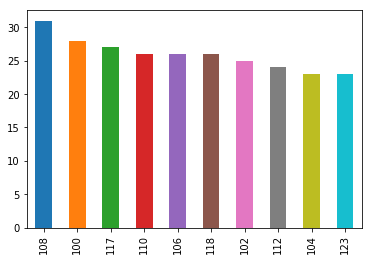

In [17]:
min = data['Runtime (Minutes)'].value_counts()
print(min.head(10))
min[:10].plot.bar()

Text(0.5,1,'Popular Movies')

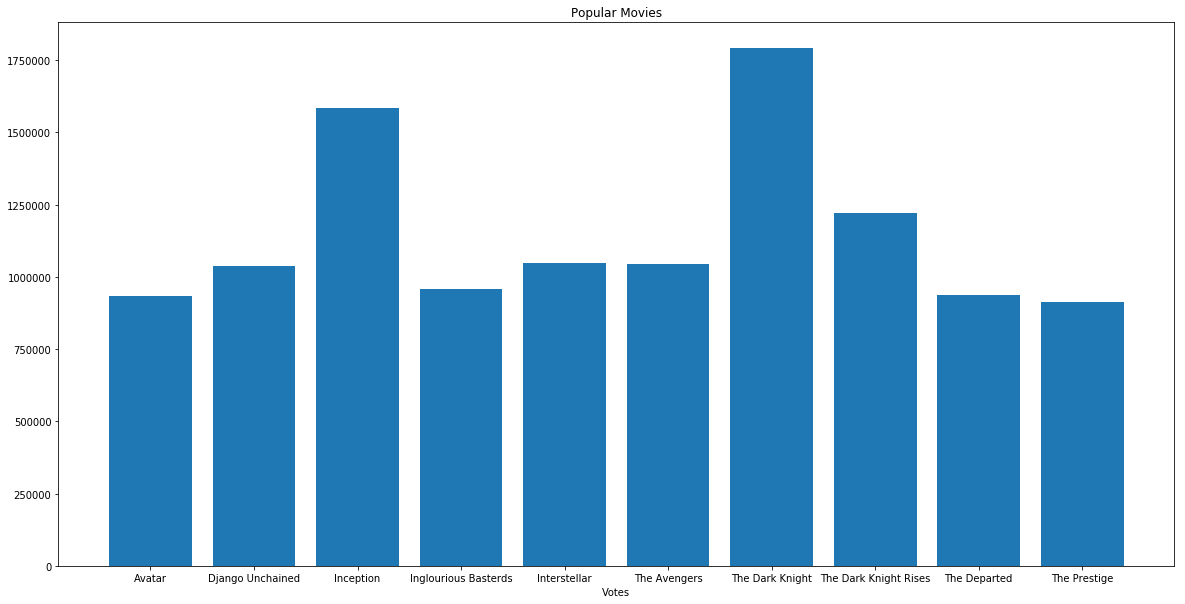

In [18]:
#Creating bar graph of popular movies

pop = data.sort_values('Votes', ascending=False)

plt.figure(figsize=(20,10))
x = pop['Title'].head(10)
y = pop['Votes'].head(10)
plt.bar(x,y)
plt.xlabel("Votes")
plt.title("Popular Movies")

In [19]:
#This is one of the benefits of using visualization for data that we can easily see the difference in data.

Box plot is showing us the same thing that the most of the movies have a duration somewhere from 110 to 120 and we also have a clear median. Therefore, we were unable to tell median clearly well.


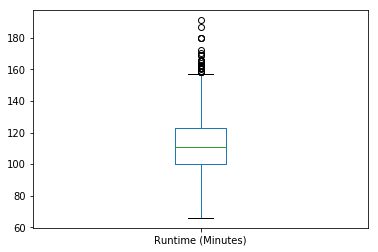

In [20]:
# use a box plot to display that same data
data['Runtime (Minutes)'].plot(kind='box')

print('Box plot is showing us the same thing that the most of the movies have a duration somewhere from 110 to 120 and we also have a clear median. Therefore, we were unable to tell median clearly well.')

## Intermediate data visualizations and analytics

In [21]:
#Counting how many movies have each of movie ratings
data[['Rating', 'Title']].groupby('Rating').count()

,Title
Rating,
1.9,1
2.7,2
3.2,1
3.5,2
3.7,2
3.9,3
4.0,1
4.1,1
4.2,2


In [22]:
data[["Director", "Rating"]].groupby(['Director']).mean().sort_values(by='Rating', ascending=False)

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Makoto Shinkai,8.60
Olivier Nakache,8.60
Florian Henckel von Donnersmarck,8.50
Aamir Khan,8.50
Damien Chazelle,8.40
Naoko Yamada,8.40
Rajkumar Hirani,8.30


Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
Michael Bay           6
Zack Snyder           5
Antoine Fuqua         5
Peter Berg            5
Justin Lin            5
Denis Villeneuve      5
David Fincher         5
Christopher Nolan     5
Danny Boyle           5
J.J. Abrams           5
Martin Scorsese       5
Name: Director, dtype: int64


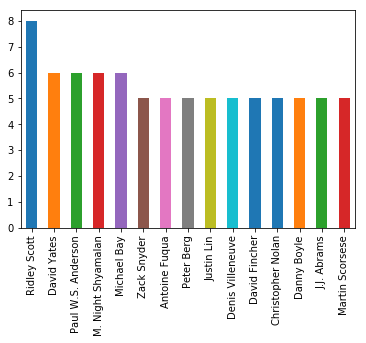

In [23]:
#Count of directors movies with plot bar

director = data['Director'].value_counts()

print(director.head(15))
director[:15].plot.bar()

Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Edward Asner, Jordan Nagai, John Ratzenberger, Christopher Plummer     1
Jared Leto, Sarah Polley, Diane Kruger, Linh Dan Pham                  1
Jemaine Clement, Taika Waititi,Cori Gonzalez-Macuer, Jonny Brugh       1
Emma Watson, Daniel Brühl, Michael Nyqvist,Richenda Carey              1
Tilda Swinton, John C. Reilly, Ezra Miller, Jasper Newell              1
Jason Clarke, Ang Phula Sherpa, Thomas M. Wright, Martin Henderson     1
Matt Damon, Kate Winslet, Jude Law, Gwyneth Paltrow                    1
Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn               1
Hugh Jackman, Russell Crowe, Anne Hathaway,Amanda Seyfried             1
Amy Adams, Jake Gyllenhaal, Michael Shannon, Aaron 

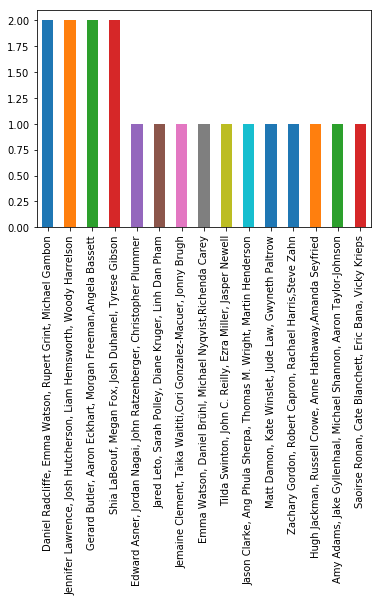

In [24]:
#Count of actors movies with plot bar

actor = data.Actors.value_counts()
print(actor.head(15))
actor[:15].plot.bar()


### Rating Visualization

In [25]:
#Describe of ratings
data['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

(array([  1.,   3.,   8.,  20.,  55., 154., 283., 281., 172.,  23.]),
 array([1.9 , 2.61, 3.32, 4.03, 4.74, 5.45, 6.16, 6.87, 7.58, 8.29, 9.  ]),
 <a list of 10 Patch objects>)

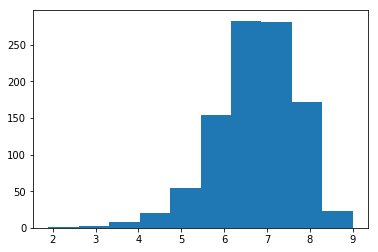

In [26]:
#Distribution of ratings

plt.hist(data['Rating'])

Text(0,0.5,'Title Count')

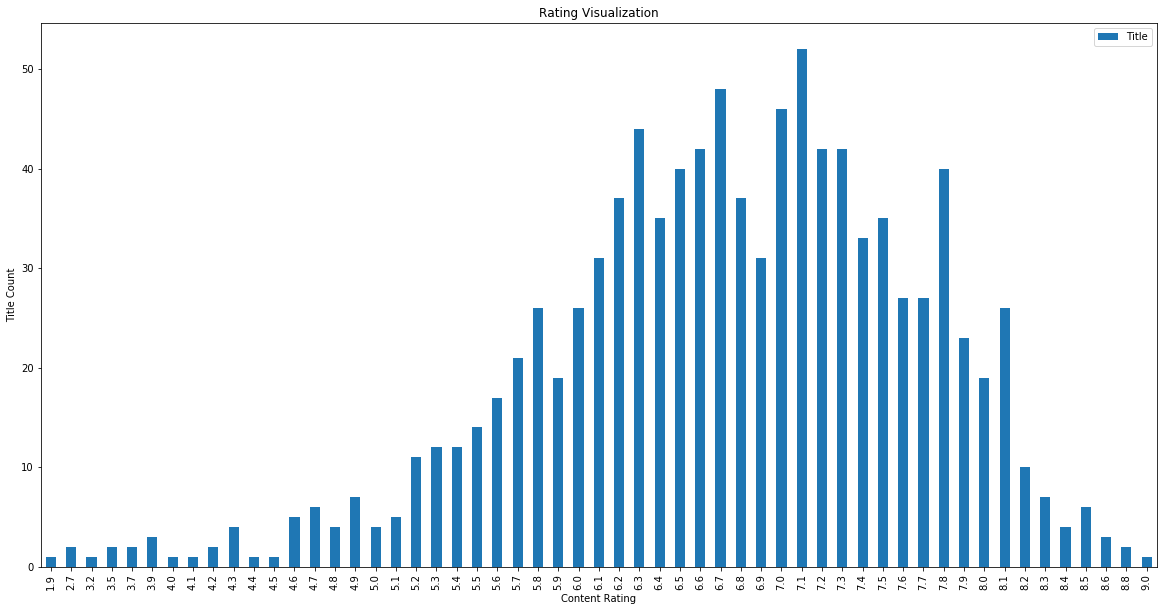

In [27]:
# Using visualization to display that same data with movie names and ratings

visual = data[['Rating', 'Title']].groupby('Rating').count()
visual.plot(kind='bar', title='Rating Visualization', figsize = (20,10))
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [28]:
# take the average ratings value and group them by concern MovieId ....
avg = data.groupby('Title').mean()
avg.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,
(500) Days of Summer,508.0,2009.0,95.0,7.7,398972.0,32.39,76.0
10 Cloverfield Lane,119.0,2016.0,104.0,7.2,192968.0,71.90,76.0
10 Years,697.0,2011.0,100.0,6.1,19636.0,0.20,NaN
12 Years a Slave,112.0,2013.0,134.0,8.1,486338.0,56.67,96.0
127 Hours,818.0,2010.0,94.0,7.6,294010.0,18.33,82.0


### Relations of Features

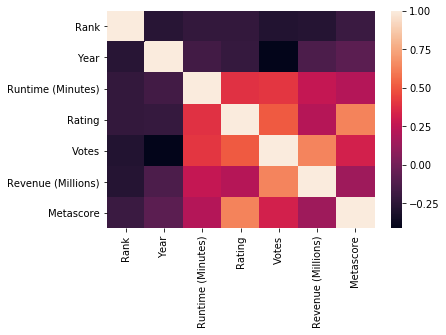

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [29]:
#Visualizing the correlations between these features

corr = data.corr()

sns.heatmap(corr)

plt.show()

corr

### Cleaning Data

In [30]:
data.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [31]:
#Count number of missing values in each column
data.isnull().sum(axis=0)

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [32]:
new = data.dropna()
new.head(15)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [33]:
new['Genre'].head(10)

0        Action,Adventure,Sci-Fi
1       Adventure,Mystery,Sci-Fi
2                Horror,Thriller
3        Animation,Comedy,Family
4       Action,Adventure,Fantasy
5       Action,Adventure,Fantasy
6             Comedy,Drama,Music
8     Action,Adventure,Biography
9        Adventure,Drama,Romance
10      Adventure,Family,Fantasy
Name: Genre, dtype: object

In [34]:
df = pd.concat([new, new.Genre.str.get_dummies(sep=',')], axis=1)
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,...,0,0,0,0,0,0,0,0,0,0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,...,0,1,0,0,0,0,0,0,0,0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,...,0,0,0,0,0,0,0,0,0,0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,...,0,0,0,0,1,0,0,0,0,0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,...,0,0,0,0,0,0,0,0,0,0


In [35]:
movie_genres = new['Genre'].str.split(',', expand=True)
movie_genres.columns = ['genre','gener1','genre2']
movie_genres.head()

,genre,gener1,genre2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy


In [36]:
movie_genres['Title'] = new['Title']
movie_genres['Rank'] = new['Rank']
movie_genres['Rating'] = new['Rating']
movie_genres['Metascore'] = new['Metascore']
movie_genres.shape

(838, 7)

In [37]:
movie_genres

,genre,gener1,genre2,Title,Rank,Rating,Metascore
0,Action,Adventure,Sci-Fi,Guardians of the Galaxy,1,8.1,76.0
1,Adventure,Mystery,Sci-Fi,Prometheus,2,7.0,65.0
2,Horror,Thriller,None,Split,3,7.3,62.0
3,Animation,Comedy,Family,Sing,4,7.2,59.0
4,Action,Adventure,Fantasy,Suicide Squad,5,6.2,40.0
5,Action,Adventure,Fantasy,The Great Wall,6,6.1,42.0
6,Comedy,Drama,Music,La La Land,7,8.3,93.0
8,Action,Adventure,Biography,The Lost City of Z,9,7.1,78.0
9,Adventure,Drama,Romance,Passengers,10,7.0,41.0
10,Adventure,Family,Fantasy,Fantastic Beasts and Where to Find Them,11,7.5,66.0


In [38]:
scifi = movie_genres['genre'].str.contains('Sci-Fi')

scifi_movies = movie_genres[scifi]
scifi_movies['Rating'].mean()
#scifi_movies['rating_count'].mean()

4.5

In [39]:
comedy = movie_genres['genre'].str.contains('Drama')

Comedy_movies = movie_genres[comedy]
Comedy_movies['Rating'].mean()
#Comedy_movies['rating_count'].mean()

7.0689189189189205

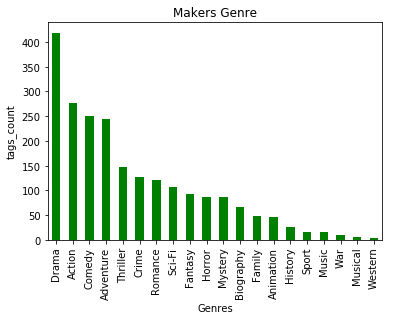

In [40]:
abc = new['Genre'].str.split(',', expand=True)
graph1_data = abc.stack().value_counts()
graph1_data.plot.bar(color='green')
plt.xlabel('Genres')
plt.ylabel('tags_count')
plt.title('Makers Genre')
plt.show()
#graph1_data.shape
#type(graph1_data)

In [41]:
abc.head()

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy


### Splitting Data

In [66]:
X = new
X.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [67]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

In [68]:
train, test = train_test_split(new,test_size=0.30)
train.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
677,678,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102,7.2,80415,0.01,44.0
643,644,Frantz,"Drama,History,War","In the aftermath of WWI, a young German who gr...",François Ozon,"Pierre Niney, Paula Beer, Ernst Stötzner, Mari...",2016,113,7.5,4304,0.86,73.0
683,684,The Mortal Instruments: City of Bones,"Action,Fantasy,Horror","When her mother disappears, Clary Fray learns ...",Harald Zwart,"Lily Collins, Jamie Campbell Bower, Robert She...",2013,130,5.9,112313,31.17,33.0
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
95,96,The Nice Guys,"Action,Comedy,Crime","In 1970s Los Angeles, a mismatched pair of pri...",Shane Black,"Russell Crowe, Ryan Gosling, Angourie Rice, Ma...",2016,116,7.4,175067,36.25,70.0


In [69]:
#Defining features and target for this dataset based on co-relation
features = ['Year', 'Votes','Revenue (Millions)', 'Metascore']
target = ['Rating']

In [70]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [71]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn.linear_model import LassoLarsIC
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [73]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.5668937952668519
Testing score:  0.5515231328094161


In [87]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [86]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

Training score:  0.1288894500153015
Testing score:  0.4267721707270009


In [84]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('Rating ~ Metascore', data=X)
model = model.fit()

print("Summary: \n", model.summary())

print("Model’s parameters: \n")
print(model.params)

Summary: 
                             OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     691.1
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          1.72e-111
Time:                        15:28:35   Log-Likelihood:                -826.85
No. Observations:                 838   AIC:                             1658.
Df Residuals:                     836   BIC:                             1667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7392      0.082     57.7

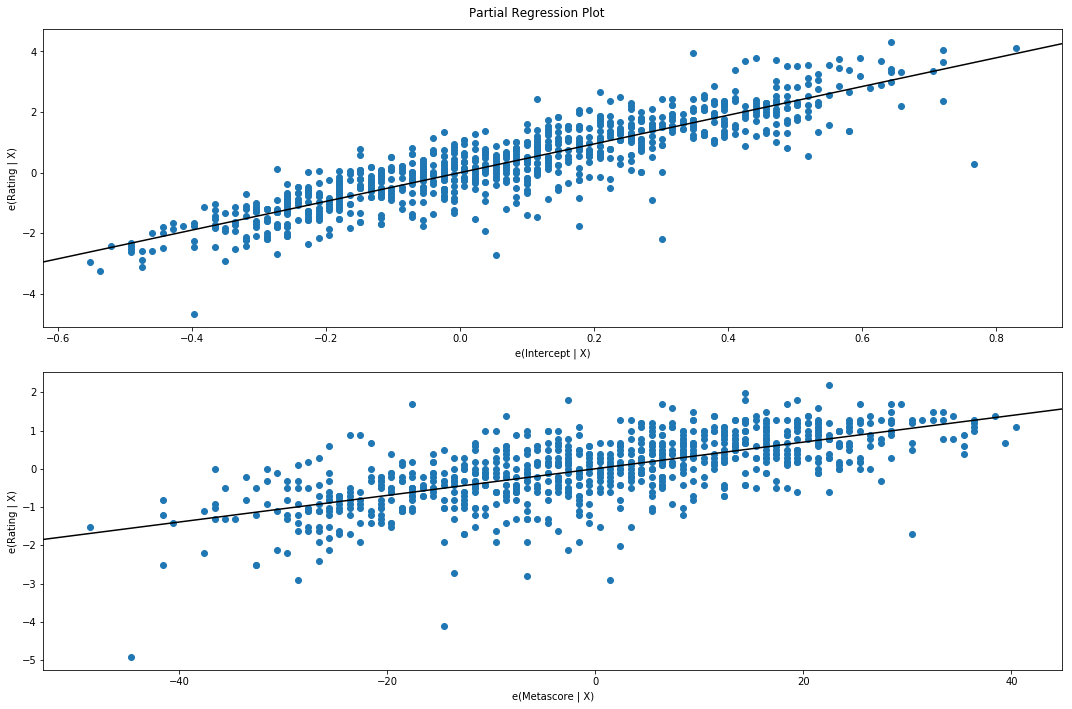

In [78]:
# plot 
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)